# 初识图像

- https://docs.opencv.org/3.4.2/dc/d2e/tutorial_py_image_display.html

## cv.imread() 

该函数第一个参数为路径，第二个参数有三个选项：

- cv.IMREAD_COLOR (1)：忽略透明通道
- cv.IMREAD_GRAYSCALE (0)：灰度模式读取
- cv.IMREAD_UNCHANGED (-1)：读取包含alpha（透明）通道的图像

In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('', 0)
print(img)

None


路径不正确是，imread函数返回None

In [2]:
jpg = cv.imread('jpg.jpg')
print(jpg.shape)
jpg = cv.imread('jpg.jpg', cv.IMREAD_COLOR)
print(jpg.shape)
jpg = cv.imread('jpg.jpg', cv.IMREAD_GRAYSCALE)
print(jpg.shape)
jpg = cv.imread('jpg.jpg', cv.IMREAD_UNCHANGED)
print(jpg.shape)

png = cv.imread('png.png')
print(png.shape)
png = cv.imread('png.png', cv.IMREAD_COLOR)
print(png.shape)
png = cv.imread('png.png', cv.IMREAD_GRAYSCALE)
print(png.shape)
png = cv.imread('png.png', cv.IMREAD_UNCHANGED)
print(png.shape)

(300, 300, 3)
(300, 300, 3)
(300, 300)
(300, 300, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512)
(512, 512, 4)


观察发现，imread第二个参数，默认为`cv.IMREAD_COLOR`，即使对`jpg`格式文件以`IMREAD_UNCHANGED`模式读取，也没有透明通道，但是对`png`格式图像有，因为该格式本身就含有透明通道。

## cv.imshow() 

显示图像

In [3]:
cv.imshow('png',jpg)
cv.imshow('jpg',png)
# 获取任何按键都会继续向下执行
cv.waitKey(0)
# 关闭所有打开的窗口
# cv.destroyAllWindows()
# 传入窗口名，关闭指定窗口
cv.destroyWindow("png")
import time
time.sleep(3)
cv.destroyWindow("jpg")

In [4]:
# 窗口最大化以后，图片会随着最大化
cv.namedWindow('jpg1', cv.WINDOW_NORMAL)
# 默认cv.WINDOW_AUTOSIZE，窗口最大化之后，图像还是原来大小
cv.imshow('jpg',jpg)
cv.imshow('jpg1',jpg)
cv.waitKey(0)
cv.destroyAllWindows()

## cv.imwrite() 

写入图像

In [5]:
# 可以通过imwrite转格式
cv.imwrite('1.png',jpg)
cv.imwrite('1.jpg',png)
# 控制jpg压缩质量
# 取值0~100，质量从低到高
q = 0
cv.imwrite("jpg_0.jpg", jpg, [int(cv.IMWRITE_JPEG_QUALITY), q])
q=100
cv.imwrite("jpg_100.jpg", jpg, [int(cv.IMWRITE_JPEG_QUALITY), q])

True

## Using Matplotlib

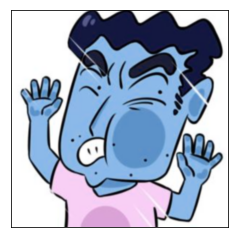

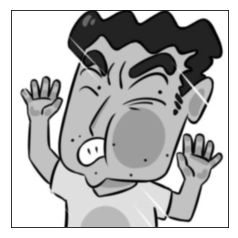

In [6]:
from matplotlib import pyplot as plt


# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
# cmap设定色彩模式，这里jpg是彩色的，就算设定了还是显示彩色的
# interpolation 插值模式
plt.imshow(jpg, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
jpg1 = cv.imread('jpg.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(jpg1, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

注意上面彩色显示的并不正确，因为`plt.imshow`按照`RGB`格式显示图像，`imread`函数返回的`numpy`数组按照BGR(A)格式返回

## cv.split() and cv.merge()

分割通道与合并通道

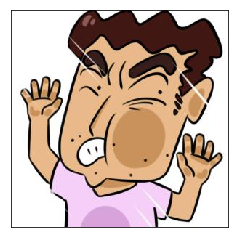

In [8]:
B, G, R = cv.split(jpg)
new_jpg = cv.merge([R, G, B])

plt.imshow(new_jpg)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## cv.cvtColor(	src, code[, dst[, dstCn]]

- https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga397ae87e1288a81d2363b61574eb8cab

转换颜色空间。

常见的R,G,B通道的取值范围为： 
- 0-255 :CV_8U类型图片 
- 0-65535: CV_16U类型图片 
- 0-1: CV_32F类型图片 

对于线性变换来说，这些取值范围是无关紧要的。但是对于非线性转换，输入的RGB图像必须归一化到其对应的取值范围来或得最终正确的转换结果，例如从RGB->Luv转换。如果从一个8-bit类型图像不经过任何缩放（scaling）直接转换为32-bit浮点型图像，函数将会以0-255的取值范围来取代0-1的取值范围，所以在使用cvtColor函数之前需要对图像进行缩放如下：

```c++
img *= 1./255;
cvtColor(img, img, cv.COLOR_BGR2Luv);
```

函数第三个参数指定转换过程，cv.COLOR_BGR2Luv，更多格式可在下面网址查询：
- https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga4e0972be5de079fed4e3a10e24ef5ef0

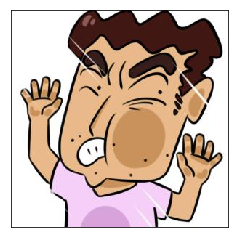

In [10]:
# 通过转换函数从BGR转换为RGB格式并显示，可以看到与上面先拆分通道再合并效果一样
new_jpg2 = cv.cvtColor(jpg, cv.COLOR_BGR2RGB)
plt.imshow(new_jpg2)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [11]:
new_jpg==new_jpg2

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ..., 
       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ 